# Estadística exploratoria:
Es una forma de analizar un conjunto de datos con respecto a conceptos básicos de la estadística como: La media, la dispersión de datos, correlaciones, entre otros:
- Cada variable es una columna.
- Por cada problema de tendrá una **variable objetivo**: Variable que deseamos predecir.

Cada conjunto de datos cuenta con una forma de atacar a nivel exploratorio. Sin embargo, se tendrán en cuenta los siguientes parámetros a la hora del análisis:

1. Identificar la **variable objetivo**, separarla en una variable.
2. Depurar el conjunto de datos: Analizar el estado de salud de los datos, qué variables no sirven, qué filas no sirven, dónde hay variables NaN.
3. Explorar la **variable objetivo**: Sacar media, medidas de dispersión, summary.
4. Realizar encoded de variables categóricas. Comparar las variables vs **Variable objetivo** (Comparación a pares).OPCIONAL: Comparar de 3 o más variables.
5. Realizar normalización de datos (Para variables continuas principalmente). Análisis de correlación.

## Cargar datos

In [ ]:
#Liberias
import pandas as pd
import csv
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sb
 
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

# librerías Árboles de Decisión
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from IPython.display import Image as PImage
from subprocess import check_call
from PIL import Image, ImageDraw, ImageFont

# librerías Gaussian Naive Bayes
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import SelectKBest
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import make_scorer


In [ ]:
from google.colab import files
uploaded = files.upload()
#Base de datos del titanic
df = pd.read_csv('Taller4_Ejemplo_titanic.csv')
df.head()

#Si se va a cargar desde un entorno distinto a colab:
#df = pd.read_csv('Taller4_Ejemplo_titanic.csv')

Variables

In [ ]:
df.columns

## **1. Variable Objetivo (Target): Survived**
# 0 = No Sobrevive
# 1 = Sobrevive

In [ ]:
print(df.groupby('Survived').size())

Distribución Variable Objetivo (Target) Relación: 1 : 0.63. Es útil conocer la distribución para modelos que se descompensen a la hora de predecir más de dos clases.

Gráfico de barras

In [ ]:
sb.factorplot('Survived',data=df,kind="count")

### Otras variables. Realizar y personalizar histogramas con matplotlib: https://www.codigopiton.com/como-hacer-un-histograma-en-python/#:~:text=Para%20realizar%20un%20histograma%20con,show%20para%20obtener%20el%20histograma.  Realizar histogramas con pandas: https://www.delftstack.com/es/api/python-pandas/pandas-dataframe-dataframe.plot.hist-function/

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import colors
df.drop(['Survived'], axis=1).hist()
plt.show()

## 2. Estado de salud de una base de datos: https://www.delftstack.com/es/howto/python-pandas/how-to-check-if-nan-exisits-in-pandas-dataframe/


In [ ]:
#Datos de mediciones de un avion de papel
from google.colab import files
uploaded = files.upload()
#Base de datos del titanic
df = pd.read_csv('Taller4_RegistroAV20221S.csv')
df

In [ ]:
df.columns    #Siempre es util conocer como están definidas las variables de nuestros datos.

Verificar si hay datos NaN/Null en pandas: https://www.delftstack.com/es/howto/python-pandas/how-to-check-if-nan-exisits-in-pandas-dataframe/

In [ ]:
#Verificar si hay un dato NaN o null en el dataframe
check_for_nan = df.isnull().values.any()
print(check_for_nan)

In [ ]:
#Determinar el numero de datos NaN
total_nan_values = df.isnull().sum().sum()
print (total_nan_values)

In [ ]:
#Revisar en qué registro y qué variables poseen datos NaN/Null
df_check=df.isnull()
print(df_check)

In [ ]:
#Revisar en qué registro exactamente hay un dato NaN
reg_NaN_V1=df[df_check['Distancia Recorrida (m)']]   #Se revisaria por cada variable
reg_NaN_V1

In [ ]:
reg_NaN_V2=df[df_check['Longitud ala a ala (cm)']]
reg_NaN_V2
#Si hay mas variables tocaría usar un for/map aplicando la más cara correspondiente.

Convertir los datos con ',' a '.' y volverlos datos tipo float.

In [ ]:
#Convertir los datos en datos numericos
data_AVC1C2C3=df[['Distancia Recorrida (m)','Longitud punta a cola (cm)','Longitud ala a ala (cm)']]    #Seleccionar un subconjunto de datos. No es aconsejable borrar datos,
                                                                                                        #solo filtrarlos, para tener en cuenta los cambios que se le van haciendo
                                                                                                        #al conjunto de datos.
for i in range(0,len(data_AVC1C2C3)):
    reg=np.array(data_AVC1C2C3.loc[i])
    l_aux=[]
    for ele in reg:
        if(pd.isna(ele)):           #Tratamiento de datos NaN
            l_aux+=[float(-1)]
        else:
            l_aux+=[float(ele.replace(',','.'))]      
    data_AVC1C2C3.loc[i]=l_aux
data_AVC1C2C3

In [ ]:
plt.hist(np.array(data_AVC1C2C3['Distancia Recorrida (m)']))    #Analizar una variable en específico
plt.show()

## 3. Analizar estadisticamente la variable objetivo

In [ ]:
from google.colab import files
uploaded = files.upload()
#Base de datos del titanic
df = pd.read_csv('Taller4_Ejemplo_titanic.csv')
df.head()

In [ ]:
#Revisar que la variable objetivo esté convertida en datos numericos-escalables
df_varGoal=df[['Survived']]
df_varGoal

In [ ]:
df_varGoal.describe()

In [ ]:
# Análisis de medidas de tendencia central: https://programmerclick.com/article/54391808486/
import scipy.stats as st

print(st.describe(np.array(df_varGoal)))

In [ ]:
#Como son clases hay que tener en cuenta la cantidad de datos por clase.
sb.factorplot('Survived',data=df_varGoal,kind="count")

## 4. Comparar variables vs Variable objetivo.

En este tipo de análisis de datos, se tiene en cuenta que la variable objetivo son clases que se desean predecir. Ej: Se desea predecir un color de una pelota de un conjunto de 4 colores. Por ende, cada clase sería cada color y se puede determinar como. Color1=0 -> Color2=1 -> Color3=2 -> Color4=3. Cada valor para las clases es arbitrario del analista.

**EJEMPLO: Si la presion arterial (BP) fuera una variable objetivo y se desea expresar numéricamente:**
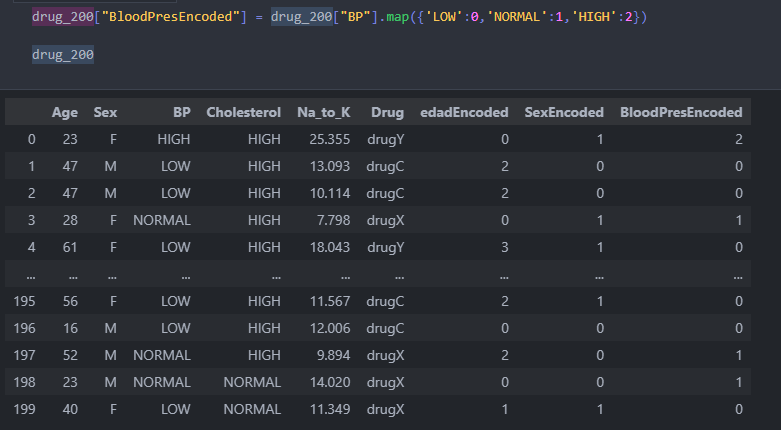

**OTRA FORMA DE REALIZAR UN ENCODED:**

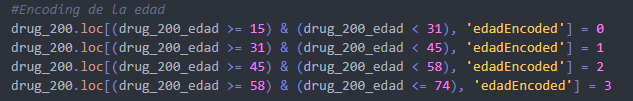

Luego de tener las variables de una forma categorica-numérica y sin datos NaN se procede a realizar el análisis de la **variable objetivo** con respecto a las otras variables.

In [ ]:
from google.colab import files
uploaded = files.upload()
#Base de datos del titanic
df = pd.read_csv('Taller4_Ejemplo_titanic.csv')
df.head()

In [ ]:
df.columns

In [ ]:
# Eliminar una columna
df = df.drop(['Name'],axis=1)
df.head()

In [ ]:
#Convertir las variables sex en 0 y 1 
df["sexEncoded"] = df["Sex"].map({'male':0,'female':1})

#Otra forma
#df.loc[df['Sex'] == 'male', 'Sex']= 0
#df.loc[df['Sex'] == 'female', 'Sex']= 1
df.head()   #Noten que la variable original no se borra sino al final, esto es para corroborar que si se están haciendo los cambios corrwctamente

In [ ]:
#Como ya se revisó que si se hicieron bien los cambios, se quita la variable original
df_change1 = df.drop(['Sex'],axis=1)
df_change1

In [ ]:
#Notemos que todas las variables son numericas, se procederá a analizar por pares
#Visualizar relación si existe relación entre las variables que no son la variable objetivo
sb.pairplot(df_change1.dropna(),
            height=4, 
            vars=['Survived', 'Pclass', 'sexEncoded', 'Age', 'Siblings/Spouses Aboard',
       'Parents/Children Aboard', 'Fare'],
            kind='scatter')
plt.show()

Se puede analizar las variables que deseemos.

In [ ]:
#Droga vs Edad
g = sb.catplot(x='sexEncoded', data=df_change1, hue='Survived', kind="count")

g.fig.suptitle("Survived vs Genero")


In [ ]:
g = sb.catplot(x='sexEncoded', data=df_change1, hue='Age', kind="count")

g.fig.suptitle("Survived vs Edad")

## 5. Normalización de datos

In [ ]:
#Normalización de los datos
def minmax_norm(df):
    return (df - df.min()) / ( df.max() - df.min())

df_norm=minmax_norm(df_change1)   #Datos previamente depurados
df_norm         #Note que para las variables binarias no tiene efecto.

Matriz de correlación de  Pearson

In [ ]:
#Haciendo la correlación de las variables con las variables significativas
matrix_correl=df_norm.corr()
sb.heatmap(matrix_correl,xticklabels=True,yticklabels=True,center=0,linewidths=1.2)

plt.title("Matriz de correlacion de supervivientes del titanic")
plt.show() 

In [ ]:
colormap = plt.cm.viridis
plt.figure(figsize=(10,10))
plt.title('Pearson Correlation of Features')
sb.heatmap(df_norm.astype(float).corr(),
           vmax=1.0,
           cmap=colormap,
           annot=True,
           linewidths=0.1,
           linecolor='white',
           square=True)

Matriz de corrlacion para Cramer V: Util para variables categóricas

In [ ]:
data_encoded = df_norm.copy()     #Se debe cambiar df_norm a su dataframe

from scipy.stats import chi2_contingency

def cramers_V(var1, var2):
  crosstab = np.array(pd.crosstab(var1, var2, rownames=None, colnames=None))
  stat = chi2_contingency(crosstab)[0]
  obs = np.sum(crosstab)
  mini = min(crosstab.shape) - 1
  return (stat/(obs*mini))

rows= []

for var1 in data_encoded:
  col = []
  for var2 in data_encoded :
    cramers =cramers_V(data_encoded[var1], data_encoded[var2])
    col.append(round(cramers,2))
  rows.append(col)
  
cramers_results = np.array(rows)
df = pd.DataFrame(cramers_results, columns = data_encoded.columns, index =data_encoded.columns)

with sb.axes_style("white"):
  ax = sb.heatmap(df,    #No cambiar
                  vmin=0.,
                  vmax=1,
                  cmap=colormap,
                  annot=True,
                  linewidths=0.1,
                  square=True)
plt.show()